# Part 2: Machine Learning Questions.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split

# -------------------------------------------------------------------------------------------

# Task 1: Data Pre-processing.

In [44]:
# reading the data from csv and excel files.

RevenueData_1 = pd.read_csv("/Users/nabeel/Downloads/Revenue Data 1.csv")
print("RevenueData_1")
print("(Rows, Columns) = ", RevenueData_1.shape)
RevenueData_1.head()

RevenueData_1
(Rows, Columns) =  (133, 7)


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020,Friday,10000.0


In [45]:
RevenueData_2 = pd.read_csv("/Users/nabeel/Downloads/Revenue Data 2.csv")
print("RevenueData_2")
print("(Rows, Columns) = ", RevenueData_2.shape)
RevenueData_2.head() 

RevenueData_2
(Rows, Columns) =  (56, 7)


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,18/03/2021,53.0,3.0,15.0,2021.0,Thursday,14909.0
1,19/03/2021,53.0,3.0,15.0,2021.0,Friday,5903.0
2,20/03/2021,53.0,3.0,15.0,2021.0,Saturday,4169.0
3,21/03/2021,54.0,3.0,15.0,2021.0,Sunday,9486.0
4,22/03/2021,54.0,3.0,15.0,2021.0,Monday,9209.0


In [46]:
MarketingData = pd.read_csv("/Users/nabeel/Downloads/Marketing Data.csv")
print("MarketingData")
print("(Rows, Columns) = ", MarketingData.shape)
MarketingData.head()

MarketingData
(Rows, Columns) =  (185, 3)


,Date,Marketing Spend,Promo
0,09/11/2020,651.375,No Promo
1,10/11/2020,1298.250,Promotion Red
2,11/11/2020,1559.375,Promotion Blue
3,12/11/2020,1801.750,No Promo
4,13/11/2020,2614.500,No Promo


In [50]:
VisitorsData = pd.read_excel("/Users/nabeel/Downloads/Visitors Data.xlsx")
print("VisitorsData")
print("(Rows, Columns) = ", VisitorsData.shape)
VisitorsData.head()

VisitorsData
(Rows, Columns) =  (185, 2)


,Date,Visitors
0,2020-11-09,707.0
1,2020-11-10,1455.0
2,2020-11-11,1520.0
3,2020-11-12,1726.0
4,2020-11-13,2134.0


In [53]:
# Concatenating RevenueData_1 and RevenueData_2.

RevenueData = pd.concat([RevenueData_1, RevenueData_2], ignore_index=True)
print("RevenueData")
print("(Rows, Columns) = ", RevenueData.shape)
RevenueData.head()

RevenueData
(Rows, Columns) =  (189, 7)


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0


In [54]:
# since Visitors and MarketingSpend dataframes have 185 rows, 
# lets find out if we have any duplicate values in RevenueData dataframe.

RevenueData[RevenueData.duplicated(subset="Date", keep=False)]

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
129,18/03/2021,NaN,NaN,NaN,2021.0,NaN,NaN
130,19/03/2021,NaN,NaN,NaN,2021.0,NaN,NaN
131,20/03/2021,NaN,NaN,NaN,2021.0,NaN,NaN
132,21/03/2021,NaN,NaN,NaN,2021.0,NaN,NaN
133,18/03/2021,53.0,3.0,15.0,2021.0,Thursday,14909.0
134,19/03/2021,53.0,3.0,15.0,2021.0,Friday,5903.0
135,20/03/2021,53.0,3.0,15.0,2021.0,Saturday,4169.0
136,21/03/2021,54.0,3.0,15.0,2021.0,Sunday,9486.0


In [55]:
# since there are 4 duplicate rows, we will consider last 4 rows because it has more informartion.

columns_to_check = ["Date"]
RevenueData = RevenueData.drop_duplicates(subset = columns_to_check, keep = "last")

In [56]:
print("RevenueData")
print("(Rows, Columns) = ", RevenueData.shape)
RevenueData.head()

RevenueData
(Rows, Columns) =  (185, 7)


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0


In [57]:
# before merging the dataframes into a single dataframe,
# the date format for VisitorsData does not match with that of others,
# we need to change it from '%Y-%m-%d' to '%d/%m/%Y'
 
VisitorsData['Date'] = VisitorsData['Date'].dt.strftime('%d/%m/%Y')
print("VisitorsData")
print("(Rows, Columns) = ", VisitorsData.shape)
VisitorsData.head()

VisitorsData
(Rows, Columns) =  (185, 2)


,Date,Visitors
0,09/11/2020,707.0
1,10/11/2020,1455.0
2,11/11/2020,1520.0
3,12/11/2020,1726.0
4,13/11/2020,2134.0


In [58]:
# lets check whether the DataTypes of all columns are accurate.

RevenueData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 188
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          185 non-null    object 
 1   Week_ID       182 non-null    float64
 2   Month Number  182 non-null    float64
 3   Month_ID      182 non-null    float64
 4   Year          182 non-null    float64
 5   Day_Name      182 non-null    object 
 6   Revenue       178 non-null    float64
dtypes: float64(5), object(2)
memory usage: 11.6+ KB


In [59]:
MarketingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             185 non-null    object 
 1   Marketing Spend  178 non-null    float64
 2   Promo            182 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.5+ KB


In [60]:
VisitorsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      185 non-null    object 
 1   Visitors  177 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [61]:
# merge all dataframes into a single dataframe 'EndeavorData'

EndeavorData = RevenueData.merge(MarketingData, on="Date", how="inner")
EndeavorData = EndeavorData.merge(VisitorsData, on="Date", how="inner")


In [63]:
#print(EndeavorData.shape)
print("EndeavorData")
print("(Rows, Columns) = ", EndeavorData.shape)
EndeavorData.head()

EndeavorData
(Rows, Columns) =  (185, 10)


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,707.0
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,1455.0
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,1520.0
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,1726.0
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2134.0


In [64]:
# Checking for Null values in the dataset

EndeavorData.isnull().sum()

Date               0
Week_ID            3
Month Number       3
Month_ID           3
Year               3
Day_Name           3
Revenue            7
Marketing Spend    7
Promo              3
Visitors           8
dtype: int64

In [65]:
# Deleting rows with NULL and missing values.

EndeavorData = EndeavorData.replace('', np.nan)
EndeavorData = EndeavorData.dropna()
EndeavorData = EndeavorData[~EndeavorData.isin(['NULL', 'null']).any(axis=1)]

In [66]:
print("EndeavorData")
print("(Rows, Columns) = ", EndeavorData.shape)
EndeavorData.head()

EndeavorData
(Rows, Columns) =  (169, 10)


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,707.0
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,1455.0
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,1520.0
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,1726.0
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2134.0


In [67]:
EndeavorData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 181
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             169 non-null    object 
 1   Week_ID          169 non-null    float64
 2   Month Number     169 non-null    float64
 3   Month_ID         169 non-null    float64
 4   Year             169 non-null    float64
 5   Day_Name         169 non-null    object 
 6   Revenue          169 non-null    float64
 7   Marketing Spend  169 non-null    float64
 8   Promo            169 non-null    object 
 9   Visitors         169 non-null    float64
dtypes: float64(7), object(3)
memory usage: 14.5+ KB


In [68]:
# changing the datatypes of numeric variables to INT.

EndeavorData['Week_ID'] = EndeavorData['Week_ID'].astype(int)
EndeavorData['Month Number'] = EndeavorData['Month Number'].astype(int)
EndeavorData['Month_ID'] = EndeavorData['Month_ID'].astype(int)
EndeavorData['Year'] = EndeavorData['Year'].astype(int)
EndeavorData['Visitors'] = EndeavorData['Visitors'].astype(int)

In [69]:
EndeavorData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 181
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             169 non-null    object 
 1   Week_ID          169 non-null    int64  
 2   Month Number     169 non-null    int64  
 3   Month_ID         169 non-null    int64  
 4   Year             169 non-null    int64  
 5   Day_Name         169 non-null    object 
 6   Revenue          169 non-null    float64
 7   Marketing Spend  169 non-null    float64
 8   Promo            169 non-null    object 
 9   Visitors         169 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 14.5+ KB


# -------------------------------------------------------------------------------------------

# Task 2: Investigating the relationship between variables.

In [70]:
# Calculating summary statistics to get a general sense of the data.

summary_stats = EndeavorData.describe()
summary_stats

,Week_ID,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,47.514793,5.076923,13.810651,2020.727811,10331.621302,1371.178583,1657.550296
std,7.745280,4.138955,1.745642,0.446410,5885.509731,630.293608,505.553020
min,34.000000,1.000000,11.000000,2020.000000,292.000000,322.000000,488.000000
25%,41.000000,2.000000,12.000000,2020.000000,5903.000000,880.000000,1322.000000
50%,48.000000,3.000000,14.000000,2021.000000,9360.000000,1181.700000,1541.000000
75%,54.000000,11.000000,15.000000,2021.000000,12850.000000,1677.700000,2029.000000
max,61.000000,12.000000,17.000000,2021.000000,28196.000000,3524.500000,4139.000000


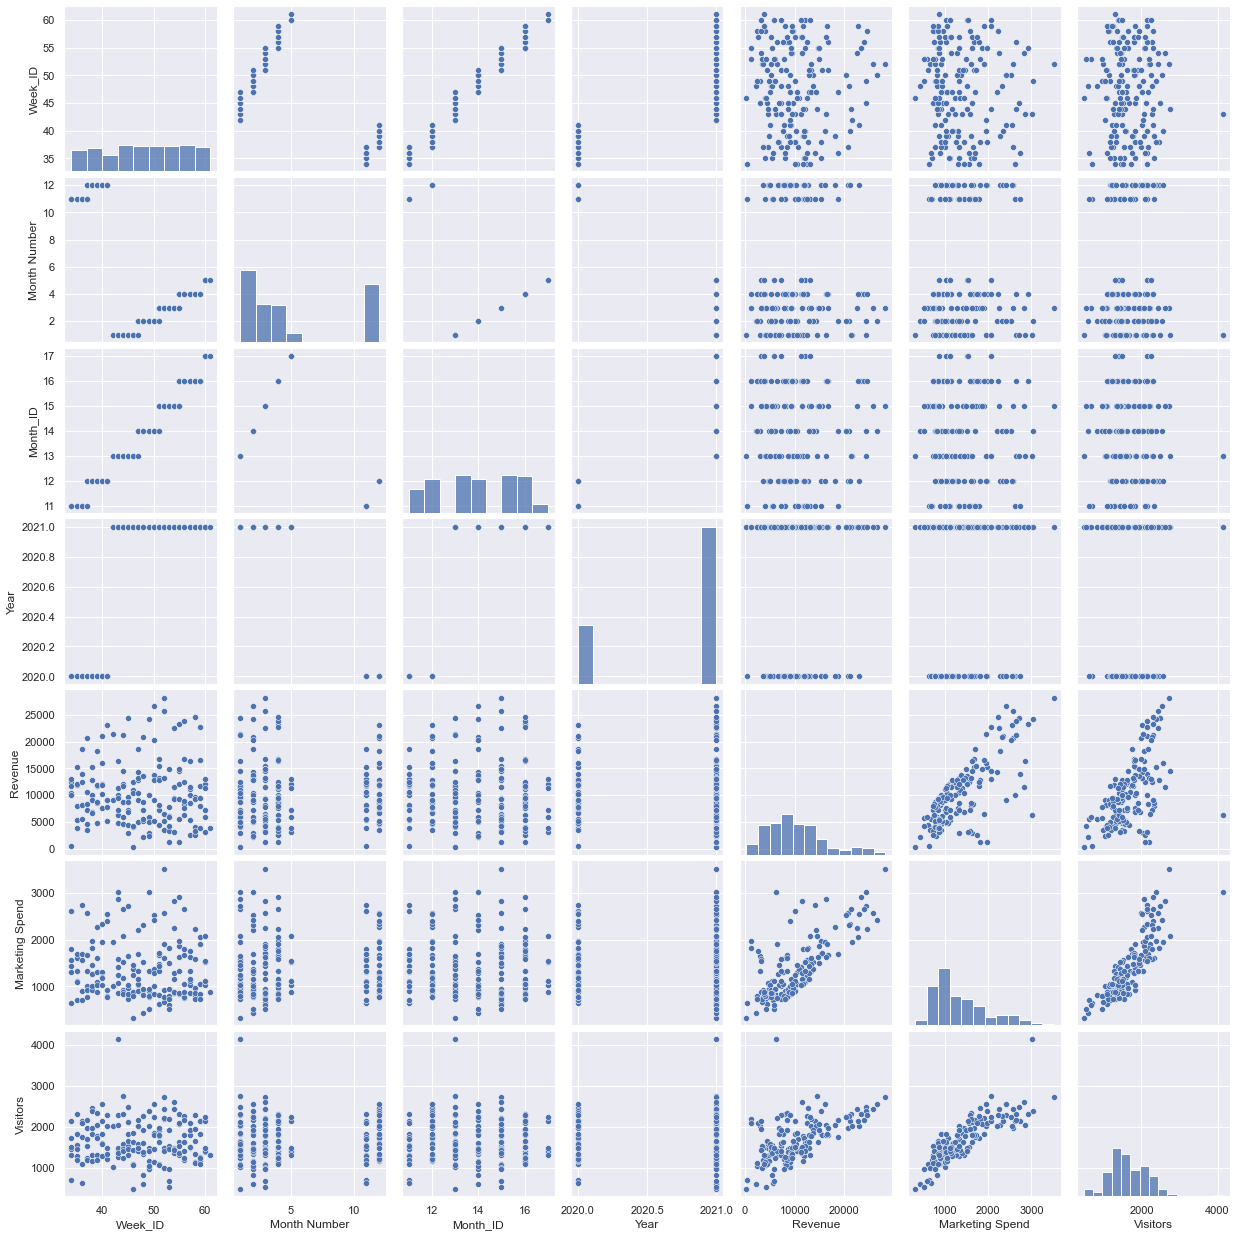

In [74]:
# Investigating numeric value with scatterplots.

sns.set(rc={'figure.figsize':(5,5)})
pairplots = sns.pairplot(EndeavorData)

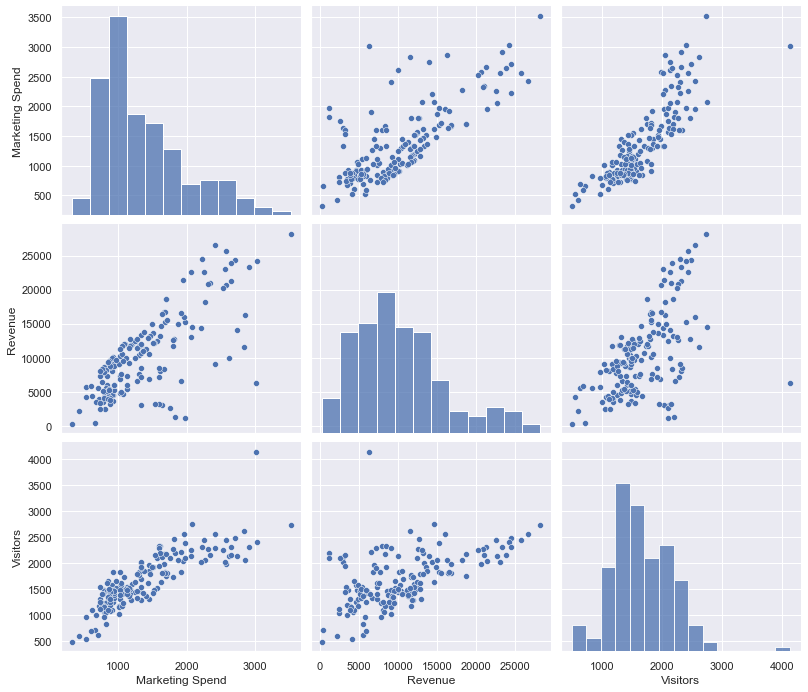

In [78]:
# Investigating the most important features from the above scatterplot.

imp_pairplots = sns.pairplot(EndeavorData[['Marketing Spend', 'Revenue', 'Visitors']])
imp_pairplots.fig.set_size_inches(12,10)

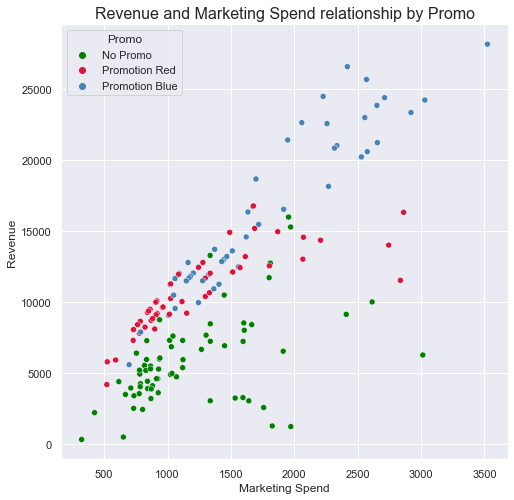

In [79]:
# Investigating Revenue and Marketing Spend relationship by Promo.

scatterr = sns.set(rc={'figure.figsize':(8,8)})
colors = ['green', 'crimson', 'steelblue']
scatterr = sns.scatterplot(x = 'Marketing Spend', y = 'Revenue', hue = 'Promo', data = EndeavorData, palette = colors)
scatterr.set_title('Revenue and Marketing Spend relationship by Promo', fontsize=16)
plt.show()

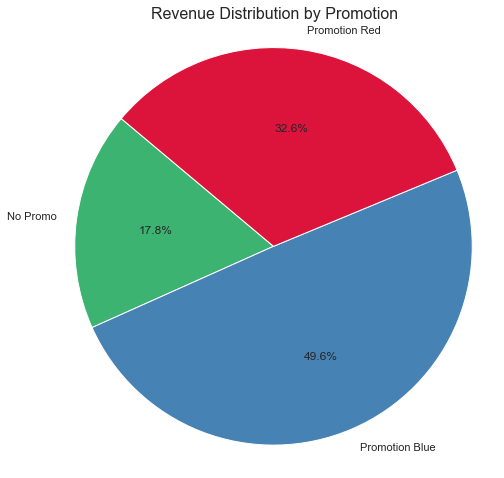

In [82]:
# Investigating the relationship of categorical data on revenue.

# Investigating the impact of promotions on revenue.

color = ['mediumseagreen', 'steelblue', 'crimson']
promo_impact = EndeavorData.groupby('Promo')['Revenue'].mean()
plt.figure(figsize=(8, 8))
plt.pie(promo_impact, labels=promo_impact.index, autopct='%1.1f%%', startangle=140, colors = color)
plt.title("Revenue Distribution by Promotion", fontsize=16)
plt.subplots_adjust(top=0.90) 
plt.axis("equal") 

plt.show()

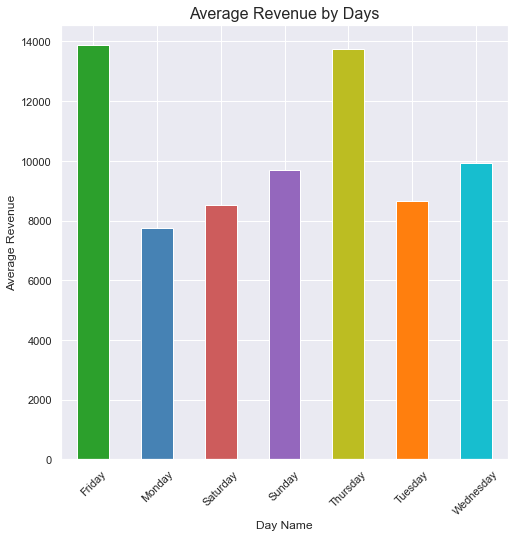

In [83]:
# Investigating impact on revenue by day of the week.

color = ['tab:green', 'steelblue', 'indianred', 'tab:purple', 'tab:olive', 'tab:orange', 'tab:cyan']
promo_impact = EndeavorData.groupby('Day_Name')['Revenue'].mean()
promo_impact.plot(kind='bar', color = color)
plt.xlabel("Day Name")
plt.ylabel("Average Revenue")
plt.title("Average Revenue by Days", fontsize=16)
plt.xticks(rotation=45)
plt.show()

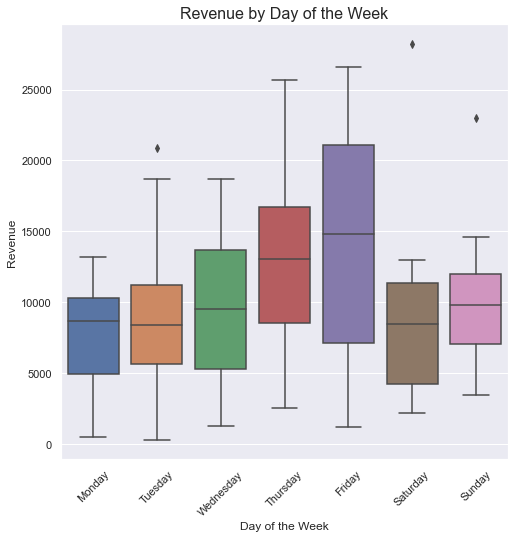

In [84]:
# Investigating the distribution of revenue by the day of the week.

sns.boxplot(x='Day_Name', y='Revenue', data=EndeavorData)
plt.xlabel("Day of the Week")
plt.ylabel("Revenue")
plt.title("Revenue by Day of the Week", fontsize=16)
plt.xticks(rotation=45)
plt.show()

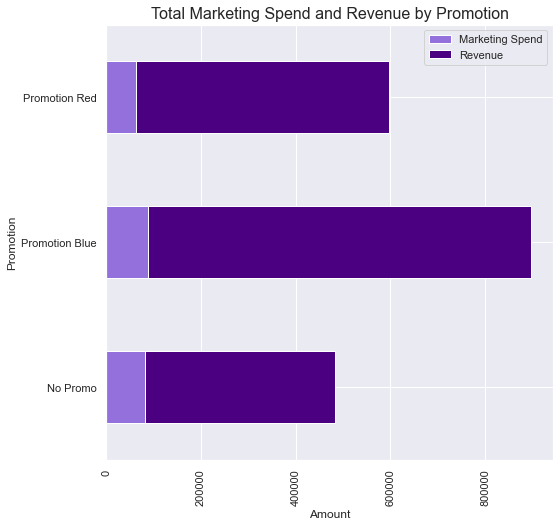

In [85]:
# Investigating the impact of Marketing Spend and Revenue by Promo.

grouped_data = EndeavorData.groupby('Promo')[['Marketing Spend', 'Revenue']].sum()

# Plot the grouped data
color = ['mediumpurple', 'indigo']
grouped_data.plot(kind='barh', stacked = True, color = color)
plt.title('Total Marketing Spend and Revenue by Promotion', fontsize=16)
plt.xlabel('Amount')
plt.ylabel('Promotion')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Day_Name', ylabel='count'>

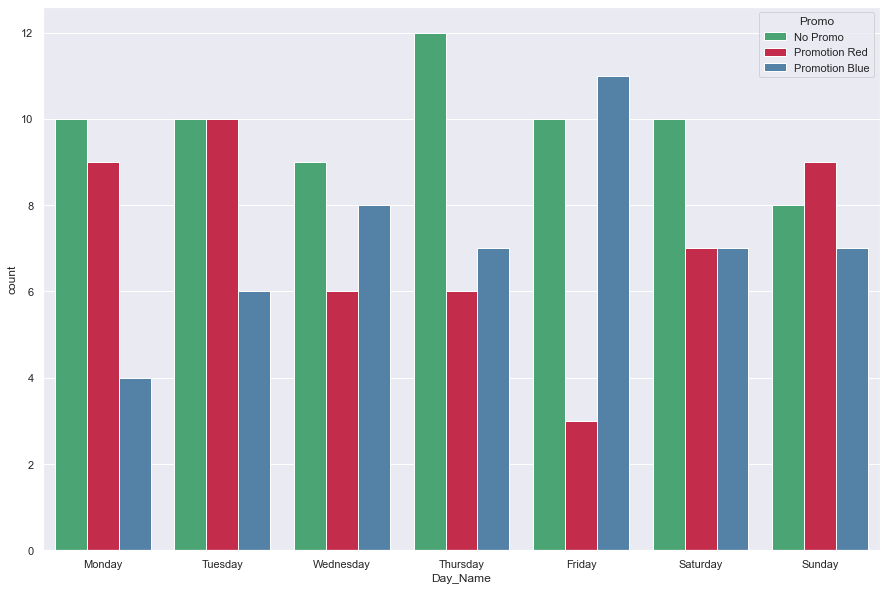

In [86]:
# Investigating Promo by Day of the week.

sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(data=EndeavorData,x='Day_Name',hue='Promo', palette= ["mediumseagreen", "crimson", "steelblue"])

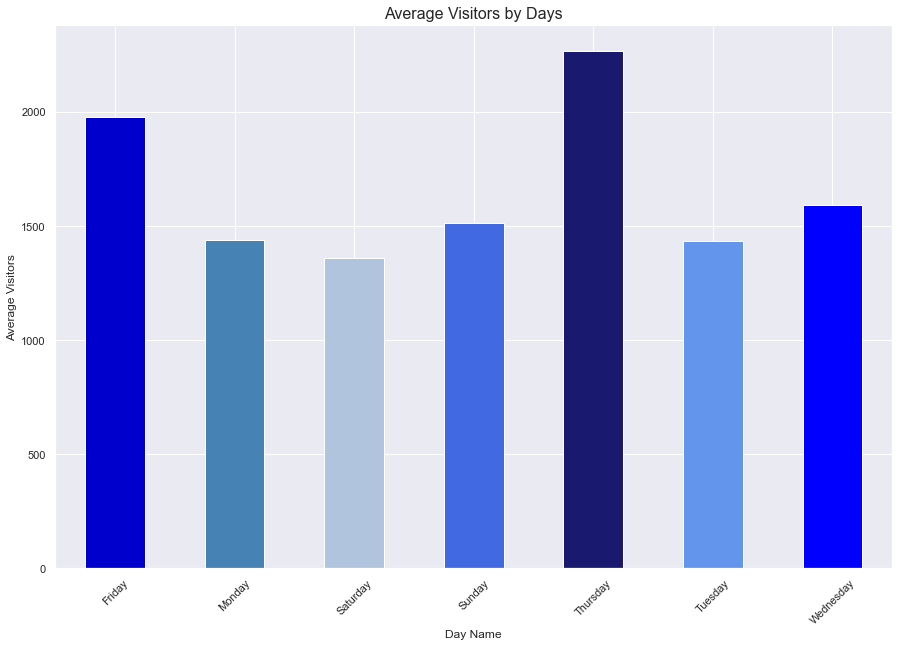

In [87]:
# Investigating impact on average visitors by day of the week.

color = ['mediumblue', 'steelblue', 'lightsteelblue', 'royalblue', 'midnightblue', 'cornflowerblue', 'blue']
promo_impact = EndeavorData.groupby('Day_Name')['Visitors'].mean()
promo_impact.plot(kind='bar', color = color)
plt.xlabel("Day Name")
plt.ylabel("Average Visitors")
plt.title("Average Visitors by Days", fontsize=16)
plt.xticks(rotation=45)
plt.show()

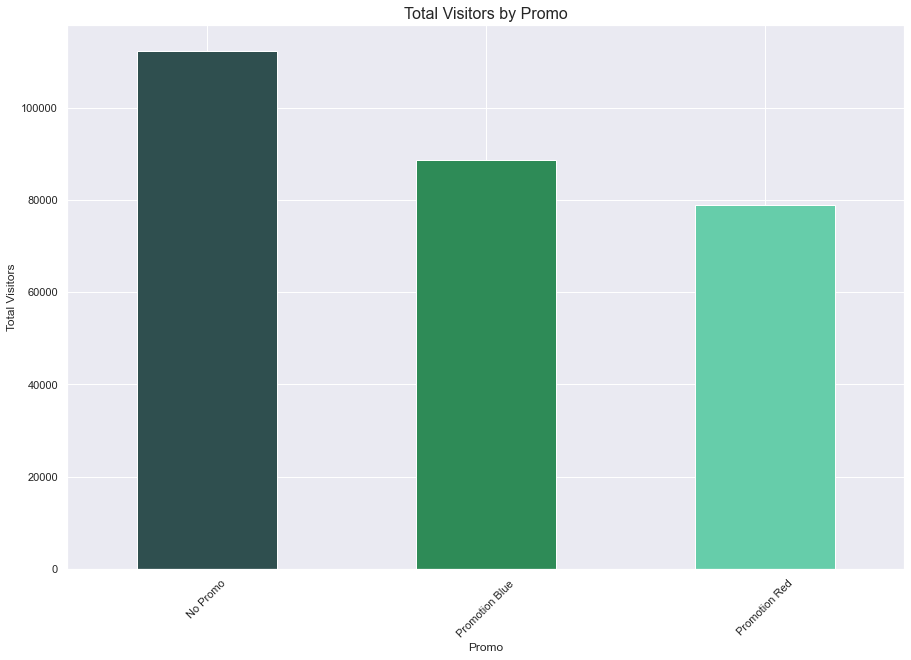

In [88]:
# Investigating impact on total visitors by promotion.

color = ['darkslategrey', 'seagreen', 'mediumaquamarine']
promo_impact = EndeavorData.groupby('Promo')['Visitors'].sum()
promo_impact.plot(kind='bar', color = color)
plt.xlabel("Promo")
plt.ylabel("Total Visitors")
plt.title("Total Visitors by Promo", fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [91]:
# Based on the scatterplots, dropping irrelevant columns as they wont be required for analysis

EndeavorData = EndeavorData.drop(columns=['Week_ID'])
EndeavorData = EndeavorData.drop(columns=['Month Number'])
EndeavorData = EndeavorData.drop(columns=['Month_ID'])
EndeavorData = EndeavorData.drop(columns=['Year'])

In [90]:
print("EndeavorData")
print("(Rows, Columns) = ", EndeavorData.shape)
EndeavorData.head()

EndeavorData
(Rows, Columns) =  (169, 6)


,Date,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,09/11/2020,Monday,465.0,651.375,No Promo,707
1,10/11/2020,Tuesday,10386.0,1298.250,Promotion Red,1455
2,11/11/2020,Wednesday,12475.0,1559.375,Promotion Blue,1520
3,12/11/2020,Thursday,11712.0,1801.750,No Promo,1726
4,13/11/2020,Friday,10000.0,2614.500,No Promo,2134


# -------------------------------------------------------------------------------------------

# Task 3: Determining which variable affects revenue the most.

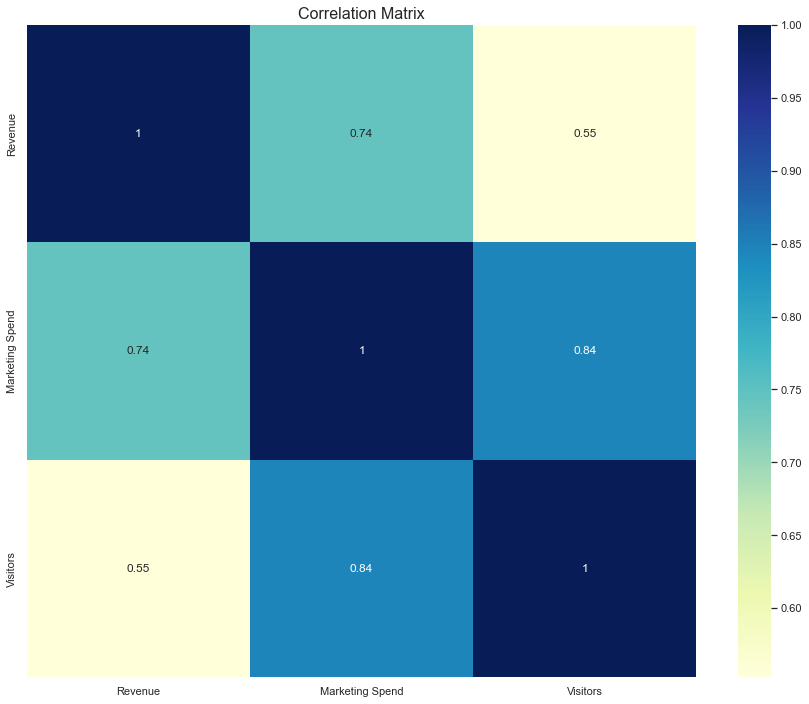





The variable that affects Revenue the most is: Marketing Spend




In [92]:
#Calculating the correlation matrix to understand how different variables are related.

sns.set(rc={'figure.figsize':(15,12)})
correlation_matrix = EndeavorData.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

correlation_revenue = correlation_matrix["Revenue"].drop("Revenue").abs()
most_influential_variable = correlation_revenue.idxmax()

print("")
print("")
print("")
print("")
print(f"The variable that affects Revenue the most is: {most_influential_variable}")
print("")
print("")

# -------------------------------------------------------------------------------------------

# Task 4: Most successful campaign (Promo) in terms of revenue and WHY.

In [93]:
campaign_revenue = EndeavorData.groupby("Promo")["Revenue"].sum()
most_successful_campaign = campaign_revenue.idxmax()
print("")
print("")
print(f"The most successful campaign in terms of Total Revenue is: {most_successful_campaign}")
print("")
print("")



The most successful campaign in terms of Total Revenue is: Promotion Blue




In [94]:
campaign_revenue2 = EndeavorData.groupby("Promo")["Revenue"].mean()
most_successful_campaign2 = campaign_revenue2.idxmax()
print("")
print("")
print(f"The most successful campaign in terms of Average Revenue is: {most_successful_campaign2}")
print("")
print("")



The most successful campaign in terms of Average Revenue is: Promotion Blue




In [95]:
# Group by "Promo" and calculateing total and average revenue.

promo_stats = EndeavorData.groupby('Promo')['Revenue'].agg(['sum', 'mean'])

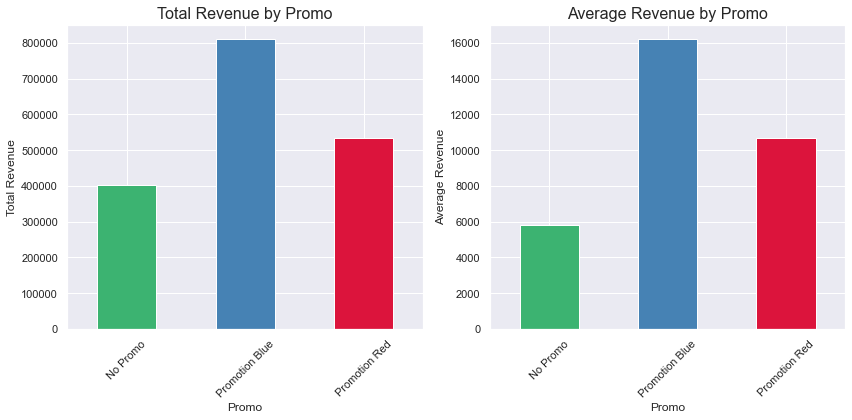

In [96]:
#Creating visualizations to compare the total and average revenue for each promotion.

color = ['mediumseagreen', 'steelblue', 'crimson']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
promo_stats['sum'].plot(kind='bar', color = color)
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Promo", fontsize=16)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
promo_stats['mean'].plot(kind='bar', color = color)
plt.ylabel("Average Revenue")
plt.title("Average Revenue by Promo", fontsize=16)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

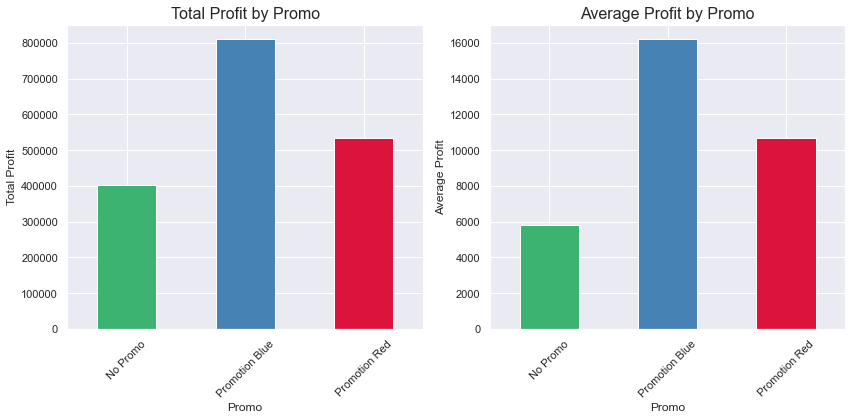

In [97]:
# Extra: Also calculating the most successful campaign (Promo) in terms of Profit.

EndeavorData['Profit'] = EndeavorData['Revenue'] - EndeavorData['Marketing Spend']
promo_profit = EndeavorData.groupby('Promo')['Profit'].agg(['sum', 'mean'])


color = ['mediumseagreen', 'steelblue', 'crimson']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
promo_stats['sum'].plot(kind='bar', color = color)
plt.ylabel("Total Profit")
plt.title("Total Profit by Promo", fontsize=16)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
promo_stats['mean'].plot(kind='bar', color = color)
plt.ylabel("Average Profit")
plt.title("Average Profit by Promo", fontsize=16)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------------------------

# Task 5: Prediction: How much revenue shall we expect if the day is Friday, we estimate to have 8,000 visitors, we estimate to spend (marketing spend) 5,000 and run Promotion Red?

In [98]:
EndeavorData.head()

,Date,Day_Name,Revenue,Marketing Spend,Promo,Visitors,Profit
0,09/11/2020,Monday,465.0,651.375,No Promo,707,-186.375
1,10/11/2020,Tuesday,10386.0,1298.250,Promotion Red,1455,9087.750
2,11/11/2020,Wednesday,12475.0,1559.375,Promotion Blue,1520,10915.625
3,12/11/2020,Thursday,11712.0,1801.750,No Promo,1726,9910.250
4,13/11/2020,Friday,10000.0,2614.500,No Promo,2134,7385.500


In [99]:
# Preparing the features and target variable.
# Converting the categorical values into numerical representation.

X = EndeavorData[['Day_Name', 'Visitors', 'Marketing Spend', 'Promo']]

#Apply one-hot encoding to transform categorical columns with  distinct variables into binary columns. 
X = pd.get_dummies(X, columns=['Day_Name', 'Promo'])

y = EndeavorData['Revenue']


In [100]:
X.head()

,Visitors,Marketing Spend,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,707,651.375,0,1,0,0,0,0,0,1,0,0
1,1455,1298.250,0,0,0,0,0,1,0,0,0,1
2,1520,1559.375,0,0,0,0,0,0,1,0,1,0
3,1726,1801.750,0,0,0,0,1,0,0,1,0,0
4,2134,2614.500,1,0,0,0,0,0,0,1,0,0


In [101]:
y.head()

0      465.0
1    10386.0
2    12475.0
3    11712.0
4    10000.0
Name: Revenue, dtype: float64

In [102]:
# Splitting data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(135, 12)
(34, 12)
(135,)
(34,)


In [103]:
# Creating and fitting a Linear Regression model.

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = model_lr.predict(X_train)

In [106]:
# Model Accuracy on testing dataset.

print("Linear Regression Score")
print("")
print('Training Accuracy: ', model_lr.score(X_train, y_train) )
print('Testing Accuracy: ', model_lr.score(X_test, y_test) )
print('Mean Absolute Error: ',mean_absolute_error(y_test,model_lr.predict(X_test)))
print('Root Mean Squared Error: ',sqrt(mean_squared_error(y_test,model_lr.predict(X_test))))
print("")
print("")
print("")
print("")

Linear Regression Score

Training Accuracy:  0.8186569892202353
Testing Accuracy:  0.73898612935404
Mean Absolute Error:  2762.749560738669
Root Mean Squared Error:  3368.5297074552104






In [110]:
# Creating and fitting a XGBoost Regressor.

model_XGB = XGBRegressor(seed = 20)
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [111]:
y_pred = model_XGB.predict(X_train)

In [113]:
# Model Accuracy on testing dataset.

print("XGBoost Regressor Score")
print("")
print('Training Accuracy: ', model_XGB.score(X_train, y_train) )
print('Testing Accuracy: ', model_XGB.score(X_test, y_test) )
print('Mean Absolute Error: ',mean_absolute_error(y_test,model_XGB.predict(X_test)))
print('Root Mean Squared Error: ',sqrt(mean_squared_error(y_test,model_XGB.predict(X_test))))
print("")
print("")
print("")
print("")

XGBoost Regressor Score

Training Accuracy:  0.9999993727721145
Testing Accuracy:  0.8739845523869113
Mean Absolute Error:  1830.1649600758271
Root Mean Squared Error:  2340.5637877142






In [114]:
# Creating and fitting a Random Forest Regressor.

model_rfr = RandomForestRegressor(n_estimators=100, max_depth=2)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

In [115]:
y_pred = model_rfr.predict(X_train)

In [116]:
# Model Accuracy on testing dataset.

print("Random Forest Regressor Score")
print("")
print('Training Accuracy: ', model_rfr.score(X_train, y_train) )
print('Testing Accuracy: ', model_rfr.score(X_test, y_test) )
print('Mean Absolute Error: ',mean_absolute_error(y_test,model_rfr.predict(X_test)))
print('Root Mean Squared Error: ',sqrt(mean_squared_error(y_test,model_rfr.predict(X_test))))
print("")
print("")
print("")
print("")

Random Forest Regressor Score

Training Accuracy:  0.8318298816020915
Testing Accuracy:  0.7803965644462174
Mean Absolute Error:  2481.5911012270444
Root Mean Squared Error:  3089.7842379186086






In [118]:
# Optimising XGBoost Regressor since it performed best on the initial test.

model_XGB_opt = XGBRegressor(n_estimators=100, learning_rate=0.2, objective='reg:squarederror')
model_XGB_opt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [119]:
y_pred = model_XGB_opt.predict(X_train)

In [121]:
# Model Accuracy on testing dataset.

print("Optimised XGBoost Regressor Score")
print("")
print('Training Accuracy: ', model_XGB_opt.score(X_train, y_train) )
print('Testing Accuracy: ', model_XGB_opt.score(X_test, y_test) )
print('Mean Absolute Error: ',mean_absolute_error(y_test,model_XGB_opt.predict(X_test)))
print('Root Mean Squared Error: ',sqrt(mean_squared_error(y_test,model_XGB_opt.predict(X_test))))
print("")
print("")
print("")
print("")

Optimised XGBoost Regressor Score

Training Accuracy:  0.9999729695762305
Testing Accuracy:  0.8802602860708307
Mean Absolute Error:  1807.3691478056066
Root Mean Squared Error:  2281.5379469345608






In [122]:
# Since the optimised version of XGBoost Regressor model performed best compared to other regression models,
# we will select this model to predict the revenue based on the specified condition.

In [123]:
#Specifying the condition to be able to make a prediction.

specified_condition = pd.DataFrame({
    "Visitors": [8000],
    "Marketing Spend": [5000],
    "Day_Name_Friday": [1],
    "Day_Name_Monday": [0],
    "Day_Name_Saturday": [0],
    "Day_Name_Sunday": [0],
    "Day_Name_Thursday": [0],
    "Day_Name_Tuesday": [0],
    "Day_Name_Wednesday": [0],
    "Promo_No Promo": [0],
    "Promo_Promotion Blue": [0],
    "Promo_Promotion Red": [1]
})

specified_condition.head()

,Visitors,Marketing Spend,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red
0,8000,5000,1,0,0,0,0,0,0,0,0,1


In [124]:
specified_condition.shape

(1, 12)

In [125]:
predicted_revenue = model_XGB_opt.predict(specified_condition)

print("")
print("")
print("")
print("")
print(f"The Predicted Revenue for the specified condition is: {predicted_revenue[0]:.2f}")
print("")
print("")
print("")
print("")





The Predicted Revenue for the specified condition is: 16160.09






# -------------------------------------------------------------------------------------------

# Task 6: Prediction: How much revenue could we have generated, had we only run the most successful campaign?

In [347]:
EndeavorData.head()

,Date,Day_Name,Revenue,Marketing Spend,Promo,Visitors,Profit
0,09/11/2020,Monday,465.0,651.375,No Promo,707,-186.375
1,10/11/2020,Tuesday,10386.0,1298.250,Promotion Red,1455,9087.750
2,11/11/2020,Wednesday,12475.0,1559.375,Promotion Blue,1520,10915.625
3,12/11/2020,Thursday,11712.0,1801.750,No Promo,1726,9910.250
4,13/11/2020,Friday,10000.0,2614.500,No Promo,2134,7385.500


In [348]:
EndeavorData.shape

(169, 7)

In [349]:
# Since we know from the EDA that "Promotion Blue" is the most successful campaign,
# we will filter the data for the "Promotion Blue" campaign.

PromotionBlueData = EndeavorData[EndeavorData['Promo'] == 'Promotion Blue']

In [350]:
PromotionBlueData.head()

,Date,Day_Name,Revenue,Marketing Spend,Promo,Visitors,Profit
2,11/11/2020,Wednesday,12475.0,1559.375000,Promotion Blue,1520,10915.625000
5,14/11/2020,Saturday,12996.0,1444.000000,Promotion Blue,1316,11552.000000
6,15/11/2020,Sunday,11929.0,1325.444444,Promotion Blue,1287,10603.555556
8,17/11/2020,Tuesday,12016.0,1092.363636,Promotion Blue,1448,10923.636364
15,24/11/2020,Tuesday,18650.0,1695.454545,Promotion Blue,1752,16954.545455


In [351]:
PromotionBlueData.shape

(50, 7)

In [352]:
# Prepare the features and target variable.

XX = PromotionBlueData[['Visitors', 'Marketing Spend']]
yy = PromotionBlueData['Revenue']

In [353]:
XX.head()

,Visitors,Marketing Spend
2,1520,1559.375000
5,1316,1444.000000
6,1287,1325.444444
8,1448,1092.363636
15,1752,1695.454545


In [354]:
yy.head()

2     12475.0
5     12996.0
6     11929.0
8     12016.0
15    18650.0
Name: Revenue, dtype: float64

In [355]:
# Since we already know that the Optimised XGBoost Regressor performed best in predicting Revenue,
# we will use the same model to train and predict the revenue.

PBmodel_XGB_opt = XGBRegressor(n_estimators=100, learning_rate=0.2, objective='reg:squarederror')
PBmodel_XGB_opt.fit(XX, yy)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [356]:
# Defining the hypothetical values for Visitors and Marketing Spend.

average_visitors = PromotionBlueData['Visitors'].mean()
average_marketing_spend = PromotionBlueData['Marketing Spend'].mean()

print("Average Visitors:", average_visitors)
print("Average Marketing Spend:", average_marketing_spend)

Average Visitors: 1776.74
Average Marketing Spend: 1751.4759393800005


In [357]:
# Predicting the revenue based on the most successful campaign "Promotion Blue".

predicted_revenue2 = PBmodel_XGB_opt.predict([[average_visitors, average_marketing_spend]])

In [358]:
print("")
print("")
print("")
print("")
print(f"The Predicted Revenue for running the most successful campaign is: {predicted_revenue2[0]:.2f}")
print("")
print("")
print("")
print("")





The Predicted Revenue for running the most successful campaign is: 16582.20






# -------------------------------------------------------------------------------------------

In [359]:
EndeavorData.head()

,Date,Day_Name,Revenue,Marketing Spend,Promo,Visitors,Profit
0,09/11/2020,Monday,465.0,651.375,No Promo,707,-186.375
1,10/11/2020,Tuesday,10386.0,1298.250,Promotion Red,1455,9087.750
2,11/11/2020,Wednesday,12475.0,1559.375,Promotion Blue,1520,10915.625
3,12/11/2020,Thursday,11712.0,1801.750,No Promo,1726,9910.250
4,13/11/2020,Friday,10000.0,2614.500,No Promo,2134,7385.500


In [360]:
EndeavorData.shape

(169, 7)

In [361]:
# Exporting the DataFrame to a CSV file.

# Specifying the path and filename for the CSV file.
csv_file_path = "/Users/nabeel/Downloads/EndeavorData.csv"

EndeavorData.to_csv(csv_file_path, index=False)  

print("DataFrame exported to", csv_file_path)

DataFrame exported to /Users/nabeel/Downloads/EndeavorData.csv
